In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import polyan

#define the trace for the experimental profile
exp_peaks = [0.003, 0.0051, 0.026, 0.018, 0.0205, 0.0155, 0.012, 0.0085, 0.008, 0.006, 0.005, 0.0035, 0.002, 0.0015, 0.001, 0.0005, 0.0002, 5e-05]
exp_peaks = exp_peaks/ np.sum(exp_peaks)
x_exp,y_exp = polyan.plot_poly(exp_peaks)

<a name='home'></a>
<h1>In this notebook</h1>
<ul style="font-size:20px">
    <li><a href='#Overview'>Overview of datasets</a></li>
    <li><a href='#Plotting'>Plotting facility for individual datasets</a></li>
    <li><a href='#Clustering'>Clustering of modelled yeast polysome traces</a></li>
    <li><a href='#RNA_ref'>Effect of reference RNA datasets</a></li>
</ul>

<a name='overview'></a>
<h2>Overview of yeast datasets used</h2>
<p>The following code can be used to plot individual datasets, by changing the value of the 'dataset' variable to any of the GEO Series Accession Numbers in the table.</p>

<table>
 <tr>
  <td> GEO </td>
  <td> Strain </td>
  <td> mRNA-Seq incl.</td>
  <td> Temp </td>
  <td> Medium </td>
  <td> CHX addition </td>
     <td>|</td>
  <td> GEO </td>
  <td> Strain </td>
  <td> mRNA-Seq incl.</td>
  <td> Temp </td>
  <td> Medium </td>
  <td> CHX addition </td>
 </tr>
 <tr>
  <td> GSE13750 </td>
  <td >BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>     
  <td> GSE84746 </td>
  <td> ns </td>
  <td> Yes </td>
  <td> ns </td>
  <td> ns </td>
  <td> A </td>
 </tr>
 <tr>
  <td> GSE34082 </td>
  <td> SK1 </td>
  <td> Yes </td>
  <td> 30  </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>     
  <td> GSE85036 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> SC-Ura </td>
  <td> A </td>
 </tr>
 <tr>
  <td> GSE41590 </td>
  <td> 74D-694 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B  </td>
     <td>|</td>
  <td> GSE85198 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> A </td>
 </tr>
 <tr>
  <td> GSE45366 </td>
  <td> BY4742 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE85590 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE50049 </td>
  <td> BY4716 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE86466 </td>
  <td> W303-1A </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr> 
  <td> GSE51164 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE87614 </td>
  <td>BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE51532 </td>
  <td> &Sigma;1278b </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE100626 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE52119 </td>
  <td> S288C </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE106572 </td>
  <td> BY4741 </td>
  <td> No </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> N </td>
 </tr>
 <tr>
  <td> GSE53313 </td>
  <td> ns </td>
  <td> Yes </td>
  <td> ns </td>
  <td> ns </td>
  <td> B </td>
     <td>|</td>
  <td> GSE107718 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr> 
  <td> GSE56622 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> SCD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE108778 </td>
  <td> SK1 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE59573 </td>
  <td> BY4741 </td>
  <td> No </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE109343 </td>
  <td> &Sigma;1278b </td>
  <td> No </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE61753 </td>
  <td> &Sigma;1278b </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE109734 </td>
  <td> BY25598 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE63789 </td>
  <td> S288C </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> SCD </td>
  <td> N </td>
     <td>|</td>
  <td> GSE115366 </td>
  <td> SK1 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE64304 </td>
  <td> Y7092 </td>
  <td> No </td>
  <td> 30 </td>
  <td> SC-Ura </td>
  <td> B </td>
     <td>|</td>
  <td> GSE116523 </td>
  <td> S288C </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> A </td>
 </tr>
 <tr>
  <td> GSE66411 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30  </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE121189 </td>
  <td> SK1 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> A </td>
 </tr>
 <tr>
  <td> GSE67387 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE122039 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE72030 </td>
  <td> BY4742 </td>
  <td> No </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE124428 </td>
  <td> CEN.PK </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> SCD </td>
  <td> A </td>
 </tr>
 <tr>
  <td> GSE76117 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td> GSE125038 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> SCD </td>
  <td> B </td>
 </tr>
 <tr>
  <td> GSE81269 </td>
  <td> BY4741 </td>
  <td> Yes </td>
  <td> 30 </td>
  <td> YPD </td>
  <td> B </td>
     <td>|</td>
  <td></td>
  <td></td>
  <td></td>
  <td></td>
  <td></td>
  <td></td>
 </tr>
</table>


<a href='#home'>Return to top</a>
<a name='Plotting'></a>
<h2>Plotting facility for individual datasets</h2>

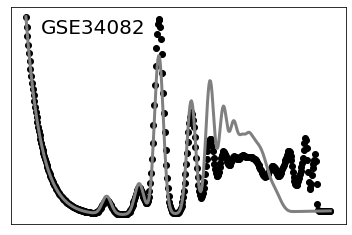

In [2]:
#plot individual datasets
dataset = 'GSE34082'

try:
    data_peaks = polyan.fp2poly(pd.read_csv('Data/'+dataset+'.csv'))
except:
    data_peaks = polyan.fp2poly(pd.read_csv('Data/'+dataset+'.csv'),has_RNA=False)
x,y = polyan.plot_poly(data_peaks)
fig,ax = plt.subplots()
ax.plot(x_exp,y_exp,c='grey',linewidth=3)
ax.scatter(x,y,c='black')
ax.text(0.05,6,dataset,fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
#plt.savefig(dataset + '.svg')
plt.show()

<a name='Clustering' ></a>
<a href='#home'>Return to top</a>
<h2>Clustering of modelled yeast polysome traces</h2>

In [3]:
#load dataset names
datasets = pd.read_csv('Data/yeast_datasets.csv')
files = list(datasets['SeriesID'])

#define a reference profile based on a representative polysome experimental profile
ref_peaks = [0.003, 0.0051, 0.026, 0.018, 0.0205, 0.0155, 0.012, 0.0085, 0.008, 0.006, 0.005, 0.0035, 0.002, 0.0015, 0.001, 0.0005, 0.0002, 5e-05]
ref_peaks = ref_peaks/ np.sum(ref_peaks)
x_ref,y_ref = polyan.plot_poly(ref_peaks)

#calculate the polysome profiles corresponding to the individual accessions
poly_vols = []
labels = []
for file in files:
    dats = pd.read_csv('Data/'+file+'.csv', index_col=False)
    if 'RNA_Prints' in dats.columns:
        poly_vols.append(polyan.fp2poly(dats))
        labels.append(file)
    else:
        poly_vols.append(polyan.fp2poly(dats,has_RNA = False))
        labels.append(file + '#')

In [4]:
#hierarchical clustering of the polysomes
max_d = 0.175

#reformat the poly_vols into a numpy array suitable as input for scipy.cluster.vq.kmeans
if 'poly_array' in locals():
    del(poly_array)
for series in poly_vols:
    if 'poly_array' in locals():
        poly_array = np.concatenate((poly_array,series),axis=0)
    else:
        poly_array = series
poly_array = poly_array.reshape(int(len(poly_vols)), int(len(poly_vols[0])))

Z = linkage(poly_array,'complete')
c, coph_dists = cophenet(Z, pdist(poly_array))
#determine the clusters
clusters = fcluster(Z,max_d,criterion='distance')

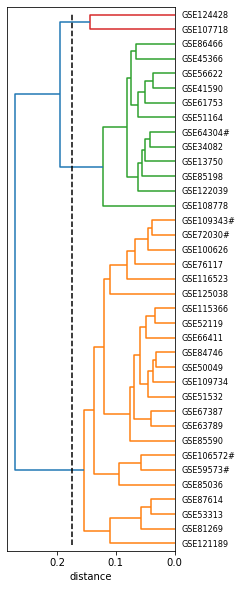

In [5]:
# calculate full dendrogram
plt.figure(figsize=(3, 10))
plt.xlabel('distance')
plt.yticks([])
max_d = 0.175
dendrogram(
    Z,
    orientation = 'left',
    color_threshold=max_d,
    labels = labels
)
plt.plot([max_d,max_d],[4,366],c='black',linewidth=1.5,linestyle ='--')
#plt.savefig('dendrogram.svg')
plt.show()

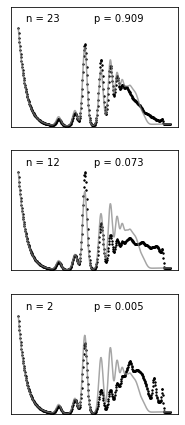

In [6]:
#prepare meta polysome plots by averaging peaks of individual clusters
fig,ax = plt.subplots(len(np.unique(clusters)),1,figsize=(3,len(np.unique(clusters))*2.5))
#process each cluster by number
for cluster in np.unique(clusters):
    cluster_no = cluster -1
    #select the peak volumes corresponding to this cluster
    these_traces = poly_array[clusters == cluster]
    #calculate the average polysome profile for this cluster
    x,y = polyan.plot_poly(np.mean(these_traces,axis=0))
    #calculate the prmsd for the average trace
    av_prmsd = polyan.prmsd_profile(np.mean(these_traces,axis=0),exp_peaks)
    #plot along with reference
    ax[cluster_no].plot(x_ref,y_ref,c='grey',alpha=0.7)
    ax[cluster_no].scatter(x,y,s=2,c='black')
    ax[cluster_no].text(0.05,7,'n = ' + str(len(these_traces)))
    ax[cluster_no].text(0.5,7,'p = %1.3f' % av_prmsd)
    ax[cluster_no].set_ylim((0,8))
    ax[cluster_no].set_yticks([])
    ax[cluster_no].set_xticks([])
#plt.savefig('clusters.svg')
plt.show()

<a name='RNA_ref'></a>
<a href='#home'>Return to top</a>
<h2>Effect of RNA-Seq data quality on modelled polysome profiles</h2>

In [7]:
comparisons = []

#process the yeast datasset files
files = list(pd.read_csv('Data/yeast_datasets.csv')['SeriesID'])
for file in files:
    #load data
    dats = pd.read_csv('Data/' + file + '.csv')
    #only process datasets that have accompanying RNA data
    if not 'RNA_Prints' in dats.columns:
        pass
    else:
        #model peak volumes with own and reference RNA data and compare each to experimental profile
        own_rna_peakvols = polyan.fp2poly(dats)
        ref_rna_peakvols = polyan.fp2poly(dats[['ORF','Ribo_Prints']],has_RNA=False)
        comparisons.append([file,-np.log10(polyan.prmsd_profile(own_rna_peakvols,exp_peaks)),-np.log10(polyan.prmsd_profile(ref_rna_peakvols,exp_peaks))])
#prepare a colour vector to identify direction of change by colour
cols = []
for n in range(len(comparisons)):
    if comparisons[n][1] > comparisons[n][2]:
        cols.append('green')
    else:
        cols.append('red')
        

In [8]:
labels, x_own,x_ref = [],[],[]
for comp in comparisons:
    labels.append(comp[0])
    x_own.append(comp[1])
    x_ref.append(comp[2])
    

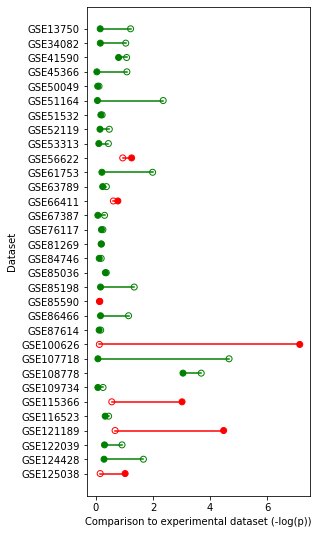

In [9]:
#plot results

#prepare a colour vector to identify direction of change by colour
cols = []
for n in range(len(comparisons)):
    if comparisons[n][1] > comparisons[n][2]:
        cols.append('green')
    else:
        cols.append('red')

#define y coordinates
ys = [len(comparisons) - (n + 1) for n in range(len(comparisons))]

fig,ax = plt.subplots(figsize=(4,9))
for n in range(len(comparisons)):
    ax.plot((comparisons[n][1],comparisons[n][2]),(ys[n],ys[n]),color=cols[n])
ax.scatter(x_own,ys,facecolors = 'white',edgecolors=cols)
ax.scatter(x_ref,ys,c=cols)
ax.set_yticks(ys)
ax.set_yticklabels(labels)
ax.set_xlabel('Comparison to experimental dataset (-log(p))')
ax.set_ylabel('Dataset')
#plt.savefig('ref_change.svg')
plt.show()